In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




In [2]:
ls ../data/raw/crime_data/2014/csv

'~$jul14.xlsx'*   aug14.xlsx*   jan14.xlsx*   mar14.xlsx*   oct14.xlsx*
'~$sep14.xlsx'*   dec14.xlsx*   jul14.xlsx*   may14.xlsx*   sep14.xlsx*
 apr14.xlsx*      feb14.xlsx*   jun14.xlsx*   nov14.xlsx*


In [14]:
path = '2014/csv'
raw_directory = os.path.join('..','data','raw','crime_data',f'{path}/')

In [66]:
all_files = glob.glob(os.path.join(raw_directory, "*.xlsx")) # change "*.xlsx" for excel files
df_from_each_file = (pd.read_excel(f, engine='openpyxl', dtype={'Hour': str}) for f in all_files)    # change to `pd.read_excel(f)` for excel files
df   = pd.concat(df_from_each_file, ignore_index=True)     # combine into one large dataframe

# cleanup columns
#df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()
# df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [67]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,. Of Offenses,BlockRange,StreetName,. offenses,Field11,. Offenses,. Of
0,2014-04-19,17,Murder,14D30,18D,8500-8599,MARTIN LUTHER KING,BLVD,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-28,05,Murder,10H20,13R,3600-3699,MCKINNEY,ST,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-27,18,Murder,5F30,20A,7400-7499,HILLMONT,-,-,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-09,18,Murder,17E10,20A,5400-5499,RENWICK,-,-,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-24,03,Murder,18F50,03B,9300-9399,RICHMOND,AVE,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121750 entries, 0 to 121749
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           121746 non-null  datetime64[ns]
 1   Hour           121750 non-null  object        
 2   Offense Type   121750 non-null  object        
 3   Beat           121734 non-null  object        
 4   Premise        92169 non-null   object        
 5   Block Range    69989 non-null   object        
 6   Street Name    70146 non-null   object        
 7   Type           121750 non-null  object        
 8   Suffix         121750 non-null  object        
 9   . Of Offenses  52214 non-null   float64       
 10  BlockRange     51604 non-null   object        
 11  StreetName     51604 non-null   object        
 12  . offenses     51604 non-null   float64       
 13  Field11        0 non-null       float64       
 14  . Offenses     10319 non-null   float64       
 15  

# Show null data

In [63]:
df.apply(lambda x: sum(x.isnull()))

Date                  4
Hour                  0
Offense Type          0
Beat                 16
Premise           29581
Block Range       51761
Street Name       51604
Type                  0
Suffix                0
. Of Offenses     69536
BlockRange        70146
StreetName        70146
. offenses        70146
Field11          121750
. Offenses       111431
. Of             114137
dtype: int64

In [69]:
df['Hour'].unique()

array(['17', '05', '18', '03', '06', '21', '13', '14', '02', '23', '12',
       '00', '08', '19', '20', '01', '09', '16', '15', '10', '22', '07',
       '11', '04', '24', "'15", "'07", "'19", "'18", "'00", "'05", "'13",
       "'14", "'22", "'23", "'20", "'16", "'17", "'06", "'03", "'01",
       "'09", "'02", "'10", "'11", "'12", "'21", "'08", "'04"],
      dtype=object)

In [75]:
df.Hour =  df['Hour'].str.replace('\'', '')


# replace 00 to 24

In [74]:
len(df['Hour'].unique())

25

In [73]:
df.Hour.value_counts()

18    7073
15    7068
16    7006
12    6865
17    6841
14    6637
19    6515
13    6301
20    6206
10    6144
11    6102
09    5743
21    5560
08    5324
22    5295
00    4712
07    4308
23    4305
06    2874
02    2583
01    2559
03    2039
05    1970
04    1719
24       1
Name: Hour, dtype: int64

In [43]:
df[['Hour','best_hour']]

,Hour,best_hour
0,17,NaN
1,5,NaN
2,18,NaN
3,18,NaN
4,3,NaN
...,...,...
121745,21,NaN
121746,18,NaN
121747,3,NaN
121748,7,NaN


In [44]:
df

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,. Of Offenses,BlockRange,StreetName,. offenses,Field11,. Offenses,. Of,best_hour
0,2014-04-19,17,Murder,14D30,18D,8500-8599,MARTIN LUTHER KING,BLVD,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-28,5,Murder,10H20,13R,3600-3699,MCKINNEY,ST,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-27,18,Murder,5F30,20A,7400-7499,HILLMONT,-,-,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-09,18,Murder,17E10,20A,5400-5499,RENWICK,-,-,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-24,3,Murder,18F50,03B,9300-9399,RICHMOND,AVE,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121745,2014-09-15,21,Burglary,UNK,Residence or House,NaN,NaN,DR,-,NaN,2400-2499,LEE,1.0,NaN,NaN,NaN,NaN
121746,2014-09-18,18,Theft,UNK,Apartment Parking Lot,NaN,NaN,PKWY,N,NaN,7900-7999,SAM HOUSTON,1.0,NaN,NaN,NaN,NaN
121747,2014-09-19,3,Burglary,UNK,Restaurant or Cafeteria Parking Lot,NaN,NaN,ST,-,NaN,2700-2799,YALE,1.0,NaN,NaN,NaN,NaN
121748,2014-09-18,7,Burglary,UNK,Barber And Beauty Shops,NaN,NaN,RD,N,NaN,9300-9399,GESSNER,1.0,NaN,NaN,NaN,NaN


In [37]:
df.best_hour.value_counts(dropna=False)

NaN    114137
14        456
15        453
16        453
12        450
09        430
11        416
13        412
10        412
17        411
18        408
08        397
19        323
20        307
07        307
22        292
21        269
00        266
23        234
06        231
02        169
05        145
01        139
03        129
04        104
Name: best_hour, dtype: int64

In [40]:
df.best_hour.unique()

array([nan, '07', '05', '22', '15', '10', '19', '09', '08', '14', '02',
       '12', '16', '18', '21', '17', '11', '13', '06', '00', '23', '04',
       '03', '20', '01'], dtype=object)

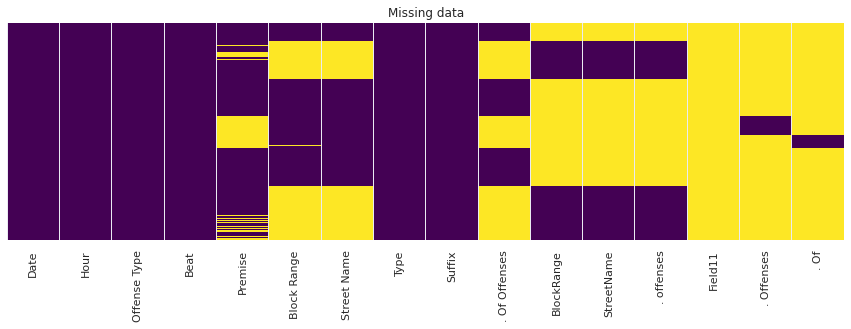

In [76]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [59]:
df[df.Hour.isna()]

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,. Of Offenses,BlockRange,StreetName,. offenses,Field11,. Offenses,. Of,best_hour
0,2014-04-19,NaN,Murder,14D30,18D,8500-8599,MARTIN LUTHER KING,BLVD,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-28,NaN,Murder,10H20,13R,3600-3699,MCKINNEY,ST,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-27,NaN,Murder,5F30,20A,7400-7499,HILLMONT,-,-,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-09,NaN,Murder,17E10,20A,5400-5499,RENWICK,-,-,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-24,NaN,Murder,18F50,03B,9300-9399,RICHMOND,AVE,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121745,2014-09-15,NaN,Burglary,UNK,Residence or House,NaN,NaN,DR,-,NaN,2400-2499,LEE,1.0,NaN,NaN,NaN,NaN
121746,2014-09-18,NaN,Theft,UNK,Apartment Parking Lot,NaN,NaN,PKWY,N,NaN,7900-7999,SAM HOUSTON,1.0,NaN,NaN,NaN,NaN
121747,2014-09-19,NaN,Burglary,UNK,Restaurant or Cafeteria Parking Lot,NaN,NaN,ST,-,NaN,2700-2799,YALE,1.0,NaN,NaN,NaN,NaN
121748,2014-09-18,NaN,Burglary,UNK,Barber And Beauty Shops,NaN,NaN,RD,N,NaN,9300-9399,GESSNER,1.0,NaN,NaN,NaN,NaN


In [18]:
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.strip()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.lower()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))       
    

In [21]:
strip_col('Hour')

column:Hour
before:73
before:73


<ipython-input-18-7da882ba8eaa>:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [22]:
df.Hour.value_counts(dropna=False)

18     6665
15     6615
16     6553
17     6430
12     6415
19     6192
14     6181
20     5899
13     5889
10     5732
11     5686
9      5313
21     5291
22     5003
8      4927
0      4446
23     4071
7      4001
6      2643
1      2420
2      2414
3      1910
5      1825
4      1615
14      412
15      410
09      405
16      400
11      383
12      377
13      374
10      372
17      355
08      354
18      339
07      278
19      275
20      256
22      228
21      221
06      214
23      186
00      175
02      144
05      129
03      117
01      115
04       94
'00      91
'12      73
'18      69
'22      64
'17      56
'16      53
'20      51
'19      48
'21      48
'23      48
'14      44
'08      43
'15      43
'10      40
'13      38
'11      33
'07      29
'02      25
'09      25
'01      24
'06      17
'05      16
'03      12
'04      10
24        1
Name: Hour, dtype: int64

In [28]:
df.Hour.

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [77]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

,null_percent
BlockRange,57.61
StreetName,57.61
. offenses,57.61
. Of Offenses,57.11
Block Range,42.51
Street Name,42.39
Premise,24.30
Beat,0.01
Date,0.00
Hour,0.00


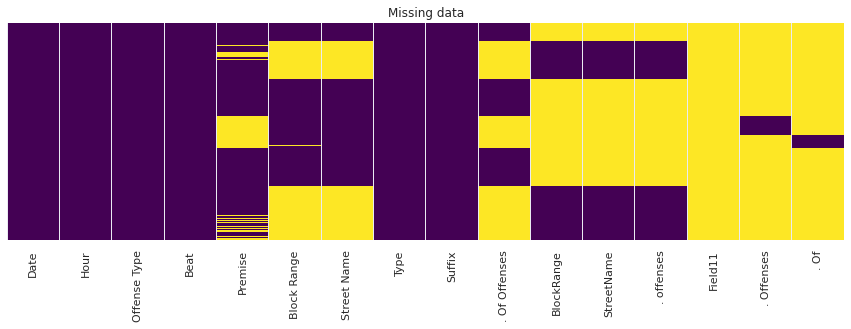

In [78]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [79]:
df.columns.tolist()

['Date',
 'Hour',
 'Offense Type',
 'Beat',
 'Premise',
 'Block Range',
 'Street Name',
 'Type',
 'Suffix',
 '. Of Offenses',
 'BlockRange',
 'StreetName',
 '. offenses',
 'Field11',
 '. Offenses',
 '. Of']

In [80]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,. Of Offenses,BlockRange,StreetName,. offenses,Field11,. Offenses,. Of
0,2014-04-19,17,Murder,14D30,18D,8500-8599,MARTIN LUTHER KING,BLVD,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-28,05,Murder,10H20,13R,3600-3699,MCKINNEY,ST,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-27,18,Murder,5F30,20A,7400-7499,HILLMONT,-,-,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-09,18,Murder,17E10,20A,5400-5499,RENWICK,-,-,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-24,03,Murder,18F50,03B,9300-9399,RICHMOND,AVE,-,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df['block_range'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

In [82]:
df['street_name'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

In [83]:
df['offenses'] = pd.concat([df['. Of Offenses'].dropna(),
                              df['. offenses'].dropna(),
                              df['. Offenses'].dropna(),
                              df['. Of'].dropna()]).reindex_like(df)

In [84]:
df = df.drop([  'Block Range','BlockRange','Street Name','StreetName','. Of Offenses','. offenses','. Offenses','. Of','Field11',
], axis = 1)

In [85]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()

In [86]:
df.apply(lambda x: sum(x.isnull()))

date                4
hour                0
offense_type        0
beat               16
premise         29581
type                0
suffix              0
block_range       157
street_name         0
offenses            0
dtype: int64

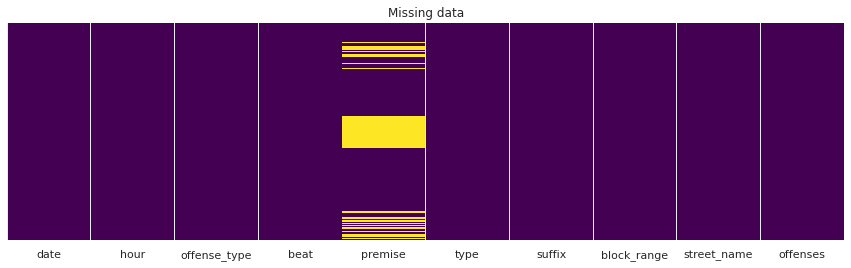

In [87]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [88]:
df[df.hour.isna()]

,date,hour,offense_type,beat,premise,type,suffix,block_range,street_name,offenses


In [89]:
# remove values with nat date
df = df[~df.date.isna()].reset_index(drop=True)

In [90]:
df.apply(lambda x: sum(x.isnull()))

date                0
hour                0
offense_type        0
beat               16
premise         29577
type                0
suffix              0
block_range       157
street_name         0
offenses            0
dtype: int64

In [ ]:
df.hour.value_counts()

In [ ]:
df[df.block_range.isna()]

In [ ]:
df[df.block_range.isna()].street_name

In [ ]:
test = df[df.block_range.isna()].copy()

In [ ]:
test

In [ ]:
test['range'] = test.street_name.str.extract(r'(\d+)', expand=True)

In [ ]:
test.range.value_counts(dropna=False)

In [ ]:
test[test.range.isna()]

In [ ]:
test.street_name.str.split('/',expand=True).tail()

In [ ]:
test.tail()

In [ ]:
df[df.block_range.isna()].offense_type.value_counts()

In [ ]:
df.hour.value_counts(dropna=False)

In [97]:
df['hour'] = df['hour'].astype('int64')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121746 entries, 0 to 121745
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          121746 non-null  datetime64[ns]
 1   hour          121746 non-null  int64         
 2   offense_type  121746 non-null  object        
 3   beat          121730 non-null  object        
 4   premise       92169 non-null   object        
 5   type          121746 non-null  object        
 6   suffix        121746 non-null  object        
 7   block_range   121589 non-null  object        
 8   street_name   121746 non-null  object        
 9   offenses      121746 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 9.3+ MB


## Combine date & hour to one column

In [99]:
df[['date','hour']]

,date,hour
0,2014-04-19,17
1,2014-04-28,5
2,2014-04-27,18
3,2014-04-09,18
4,2014-04-24,3
...,...,...
121741,2014-09-15,21
121742,2014-09-18,18
121743,2014-09-19,3
121744,2014-09-18,7


In [93]:
df.hour.unique()

array(['17', '05', '18', '03', '06', '21', '13', '14', '02', '23', '12',
       '00', '08', '19', '20', '01', '09', '16', '15', '10', '22', '07',
       '11', '04', '24'], dtype=object)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121746 entries, 0 to 121745
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          121746 non-null  datetime64[ns]
 1   hour          121746 non-null  object        
 2   offense_type  121746 non-null  object        
 3   beat          121730 non-null  object        
 4   premise       92169 non-null   object        
 5   type          121746 non-null  object        
 6   suffix        121746 non-null  object        
 7   block_range   121589 non-null  object        
 8   street_name   121746 non-null  object        
 9   offenses      121746 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 9.3+ MB


In [100]:
# convert two columns into one datetime
df['date_time'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# drop columns
df = df.drop(['date','hour'], axis = 1)

In [101]:
df.head()

,offense_type,beat,premise,type,suffix,block_range,street_name,offenses,date_time
0,Murder,14D30,18D,BLVD,-,8500-8599,MARTIN LUTHER KING,1.0,2014-04-19 17:00:00
1,Murder,10H20,13R,ST,-,3600-3699,MCKINNEY,1.0,2014-04-28 05:00:00
2,Murder,5F30,20A,-,-,7400-7499,HILLMONT,3.0,2014-04-27 18:00:00
3,Murder,17E10,20A,-,-,5400-5499,RENWICK,2.0,2014-04-09 18:00:00
4,Murder,18F50,03B,AVE,-,9300-9399,RICHMOND,1.0,2014-04-24 03:00:00


In [ ]:
df.info()

In [102]:
#change column name

df.rename(columns={
    '._of_offenses': 'offenses',
}, inplace=True)

# convert offenses to int

df['offenses'] = df['offenses'].astype('int64')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121746 entries, 0 to 121745
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   offense_type  121746 non-null  object        
 1   beat          121730 non-null  object        
 2   premise       92169 non-null   object        
 3   type          121746 non-null  object        
 4   suffix        121746 non-null  object        
 5   block_range   121589 non-null  object        
 6   street_name   121746 non-null  object        
 7   offenses      121746 non-null  int64         
 8   date_time     121746 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.4+ MB


In [ ]:
df.date_time

# Inspect evry column

In [ ]:
def create_new_cell(contents):
    '''created new jupyter cells by inputing a list of columns
    outputs'''
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        #text=f'#column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]'.format(contents),
        text=f'# column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]',
        replace=False,)
    shell.payload_manager.write_payload(payload, single=False)

    
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.strip()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.lower()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))       
    
    
    
def capital_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.capitalize()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))      

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
for col in col_list:
    create_new_cell(col)

In [ ]:
# column:date_time
df.date_time.value_counts(dropna=False)[:10]

In [ ]:
# column:offenses
df.offenses.value_counts(dropna=False)[:10]

In [ ]:
# column:suffix
df.suffix.value_counts(dropna=False)[:10]

In [ ]:
# column:type
df.type.value_counts(dropna=False)[:10]

In [ ]:
# column:street_name
df.street_name.value_counts(dropna=False)[:10]

In [ ]:
# column:block_range
df.block_range.value_counts(dropna=False)[:10]

In [ ]:
# column:premise
df.premise.value_counts(dropna=False)[:10]

In [ ]:
# column:beat
df.beat.value_counts(dropna=False)[:10]

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [104]:
col_ord =['date_time','offenses','offense_type', 'block_range', 'street_name', 'type', 'suffix','beat', 'premise']
df = df[col_ord]



file = 'crime_2014.csv'
directory_save = os.path.join('..','data','interim',f'{file}')
df.to_csv(directory_save,index=False)

In [105]:
df

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise
0,2014-04-19 17:00:00,1,Murder,8500-8599,MARTIN LUTHER KING,BLVD,-,14D30,18D
1,2014-04-28 05:00:00,1,Murder,3600-3699,MCKINNEY,ST,-,10H20,13R
2,2014-04-27 18:00:00,3,Murder,7400-7499,HILLMONT,-,-,5F30,20A
3,2014-04-09 18:00:00,2,Murder,5400-5499,RENWICK,-,-,17E10,20A
4,2014-04-24 03:00:00,1,Murder,9300-9399,RICHMOND,AVE,-,18F50,03B
...,...,...,...,...,...,...,...,...,...
121741,2014-09-15 21:00:00,1,Burglary,2400-2499,LEE,DR,-,UNK,Residence or House
121742,2014-09-18 18:00:00,1,Theft,7900-7999,SAM HOUSTON,PKWY,N,UNK,Apartment Parking Lot
121743,2014-09-19 03:00:00,1,Burglary,2700-2799,YALE,ST,-,UNK,Restaurant or Cafeteria Parking Lot
121744,2014-09-18 07:00:00,1,Burglary,9300-9399,GESSNER,RD,N,UNK,Barber And Beauty Shops
